## <center>Random Forest Assignment(Company)</center>

#### Problem Statement:
<code style="background:lightblue;color:black">A cloth manufacturing company is interested to know about the segment or attributes causes high sale.Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.</code>

In [1]:
#Importing the necessary libraries for the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the csv file and having a glance at the data
cloth_data = pd.read_csv("Company_Data.csv")
cloth_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### Making necessary EDA for the model

In [3]:
#Checking for the datatypes and null values if present any
cloth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
#Looking into statistical report of the data
cloth_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
#Checking if there are any duplicate values present
cloth_data[cloth_data.duplicated(keep = False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [6]:
#Finding the average of sales and considering all segments above that average value as fast moving products
cloth_data["salestype"]=(cloth_data["Sales"]>7.49)*1
cloth_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salestype
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [7]:
#Label Encoding the data
label_encoder=preprocessing.LabelEncoder()
cloth_data["ShelveLoc"]=label_encoder.fit_transform(cloth_data["ShelveLoc"])
cloth_data["Urban"]=label_encoder.fit_transform(cloth_data["Urban"])
cloth_data["US"]=label_encoder.fit_transform(cloth_data["US"])

In [8]:
#Looking into encoded data
cloth_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salestype
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [9]:
#Assigning the dependent and independent values
x=cloth_data.iloc[:,1:9]
y=cloth_data.iloc[:,-1]

In [10]:
#Using k-fold cross validation split, to evaluate the data with splits=10
kfold=KFold(n_splits=10,random_state=42)

#### Building the Random Forest Classifier Model

In [11]:
#Building an Random Forest Classifier with features=4 and splits=10
model = RandomForestClassifier(n_estimators=120, max_features=4)
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.8200000000000001


In [12]:
#Spliting the data into train and test model were test data is of 30%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
#Fitting the model
model.fit(x_train,y_train)

RandomForestClassifier(max_features=4, n_estimators=120)

In [14]:
#Predicting the train data accuracy on the built model
Y_pred=model.predict(x_train)

In [15]:
#Printing the train data accuracy
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


In [16]:
#Predicting the test data accuracy on the built model
y_pred=model.predict(x_test)

In [17]:
#Printing the test data accuracy
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.825


In [18]:
#Finding the better features for the model in the range of 1 to 10
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model=RandomForestClassifier(n_estimators=120, max_features=4)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [19]:
#Printing the accuracies 
data = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.791667
1,2,1.0,0.816667
2,3,1.0,0.816667
3,4,1.0,0.825000
4,5,1.0,0.816667
5,6,1.0,0.833333
6,7,1.0,0.825000
7,8,1.0,0.833333
8,9,1.0,0.816667


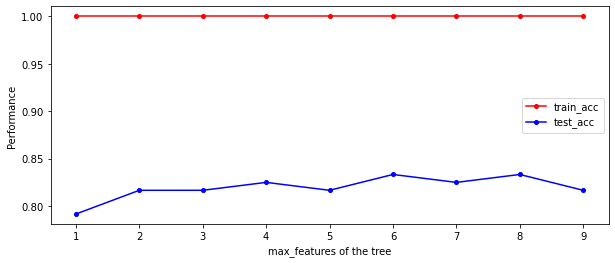

In [20]:
#Plotting the graph for the train and test data from 1 to 10 range and finding the best feature
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot()

plt.plot(data['max_features'],data['train_acc'], marker = 'o',markersize=4,color='red')
plt.plot(data['max_features'], data['test_acc'], marker = 'o',markersize=4,color='blue')
ax.set_xticks(np.arange(1,10))

plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('Performance')
plt.show()

#### Insights Drawn:
>From the plot above max features that contributes to the cloth manufacturing company is 5 with the accuracy of 79.1%.Thus, it is a good model to classify the segments or attributes in the cloth manufacturing which causes high sale.